In [1]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

current working dirC:\muktadir\pyns


In [2]:
np.random.seed(39)
logfile = "2-client-debug.log"
with open(logfile, 'w') as f:
    f.truncate()
logging.basicConfig(level=logging.DEBUG, filename=logfile)
print(f"Logging file at: {logfile}")

config = Configuration()
timeResolutionUnit = config.get('timeResolutionUnit')
network = Network.get()
nodeManager = NodeManager(timeResolutionUnit)
analyzer = AnalyzerTools()

Logging file at: 2-client-debug.log


In [3]:
nodeManager.createSimpleNodes(n=4, maxDeliveryRate=5000, debug=True)

dict_values([<core.SimpleNode.SimpleNode object at 0x000001B462B8EBC8>, <core.SimpleNode.SimpleNode object at 0x000001B46053FAC8>, <core.SimpleNode.SimpleNode object at 0x000001B462BD5688>, <core.SimpleNode.SimpleNode object at 0x000001B462BD51C8>])

In [4]:
clientManager = ClientManager(timeResolutionUnit, debug=True)
clients = clientManager.createTCPClients(2, deliveryRatePerS=10000, max_outstanding_packets=10)
client = clients[0]
client2 = clients[1]
# client = ConstClient(1, deliveryRate=250, debug=True, timeResolutionUnit=timeResolutionUnit)
# client = TCPClient(1, delay_between_packets=50, max_outstanding_packets=10, debug=True) # delivery rate is 2k packets per sec for 500
# client2 = TCPClient(2, delay_between_packets=500, max_outstanding_packets=10, debug=True) # delivery rate is 2k packets per sec for 500

In [5]:
randomNodes = nodeManager.getRandomNodes(1)
randomNodes2 = nodeManager.getRandomNodes(2)

clientManager = ClientManager(timeResolutionUnit, debug=True)
clients = clientManager.createTCPClients(2, deliveryRatePerS=10000, max_outstanding_packets=10)
client = clients[0]
client2 = clients[1]
# client = ConstClient(1, deliveryRate=250, debug=True, timeResolutionUnit=timeResolutionUnit)
# client = TCPClient(1, delay_between_packets=50, max_outstanding_packets=10, debug=True) # delivery rate is 2k packets per sec for 500
# client2 = TCPClient(2, delay_between_packets=500, max_outstanding_packets=10, debug=True) # delivery rate is 2k packets per sec for 500

server = Server(-1)
server2 = Server(-2)

path = network.createPath(client=client, nodes=randomNodes, server=server)
path2 = network.createPath(client=client2, nodes=randomNodes2, server=server2)

In [6]:
logging.info("path for client1:" + str([node.id for node in path.getNodesWithServer()]))
logging.info("path for client2:" + str([node.id for node in path2.getNodesWithServer()]))
print("path for client1:" + str([node.id for node in path.getNodesWithServer()]))
print("path for client2:" + str([node.id for node in path2.getNodesWithServer()]))

path for client1:[1, -1]
path for client2:[2, 3, -2]


{1: {'qSzie': 0}}
{1: {'qSzie': 4}}
{1: {'qSzie': 9}}
{1: {'qSzie': 9}}
{1: {'qSzie': 9}}


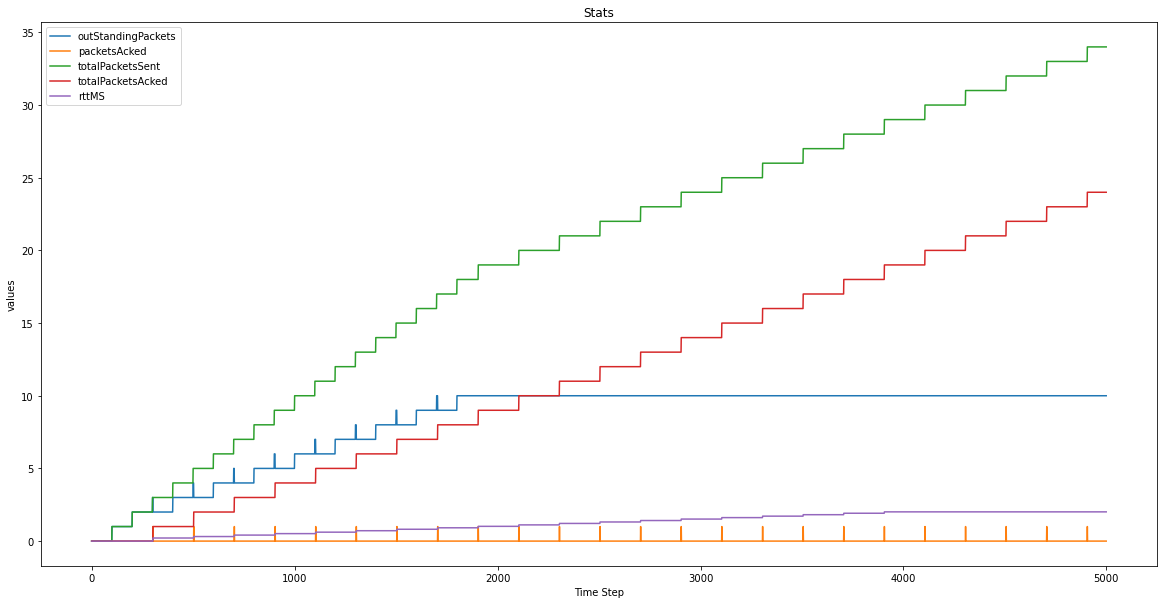

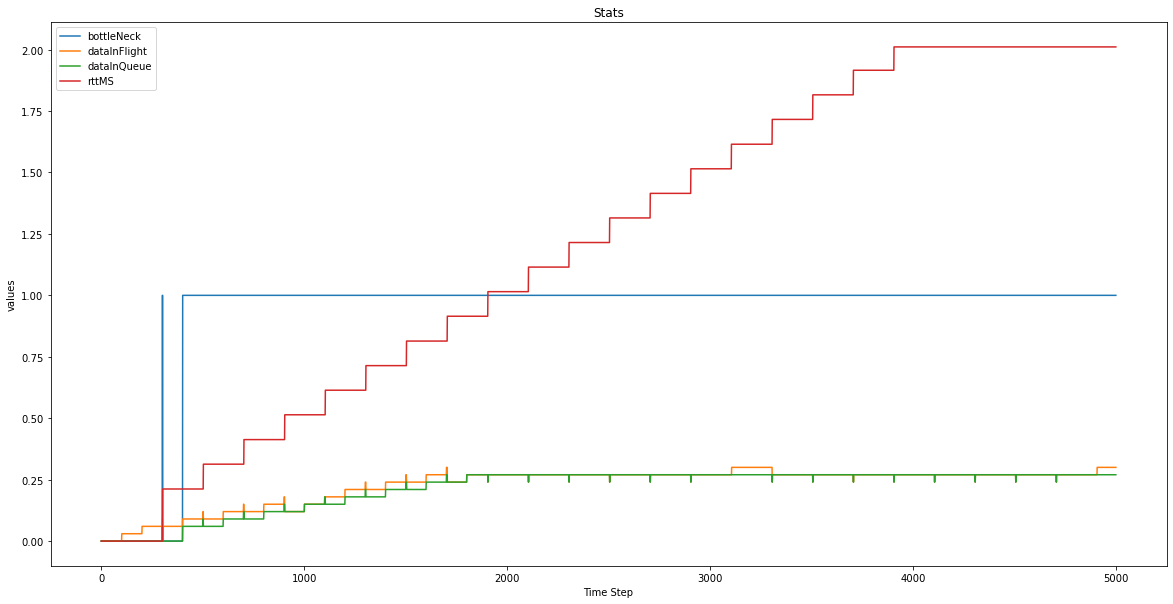

In [7]:
simulator = EventSimulator(timeResolutionUnit=timeResolutionUnit, debug=True)
simulator.addClient(client)
maxSteps = 5000 # equivalent to maxStep timeResolution unit
simulator.run(maxSteps)
# client 1 stats
analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'rttMS'])
analyzer.createPlotsForTimeSteps(client.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'rttMS'])

{1: {'qSzie': 0}}
{2: {'qSzie': 0}, 3: {'qSzie': 0}}
{1: {'qSzie': 4}}
{2: {'qSzie': 4}, 3: {'qSzie': 0}}
{1: {'qSzie': 9}}
{2: {'qSzie': 8}, 3: {'qSzie': 0}}
{1: {'qSzie': 9}}
{2: {'qSzie': 8}, 3: {'qSzie': 0}}
{1: {'qSzie': 9}}
{2: {'qSzie': 8}, 3: {'qSzie': 0}}


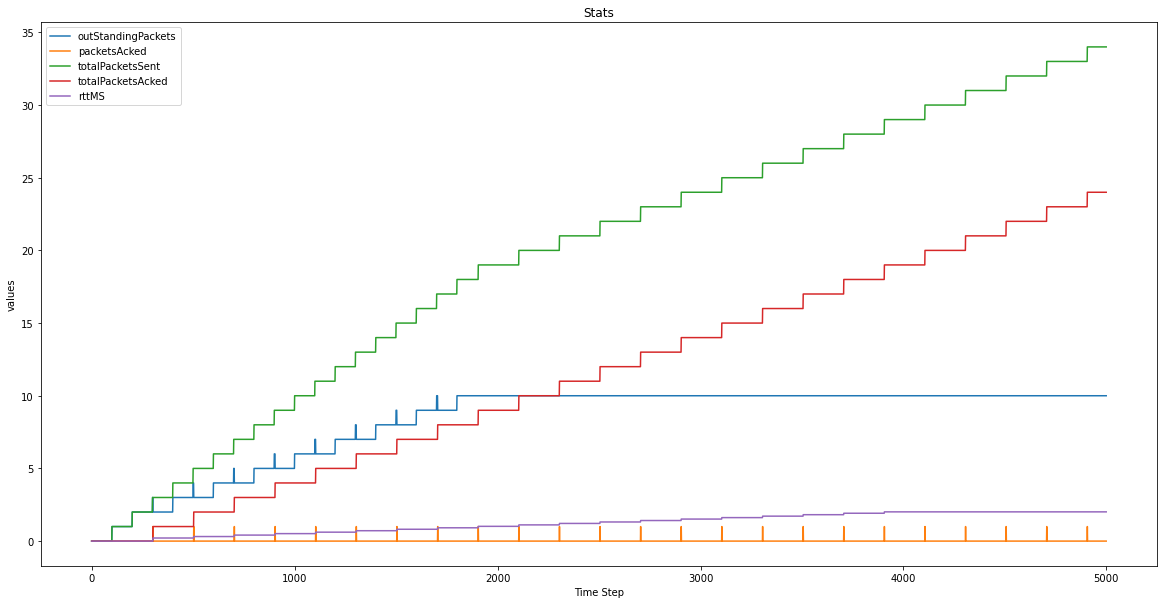

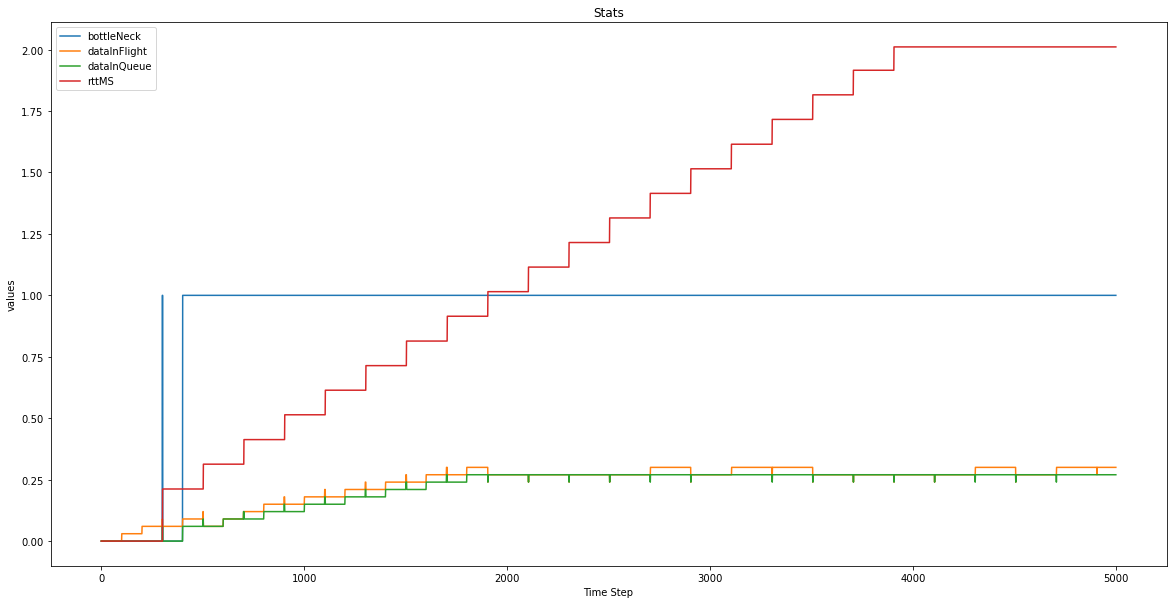

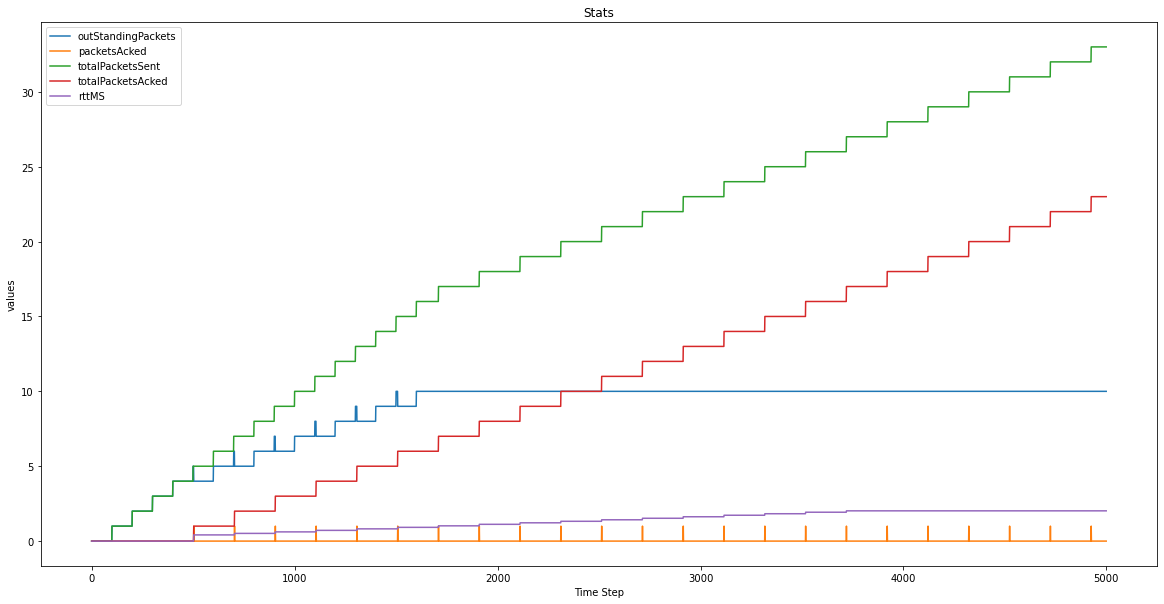

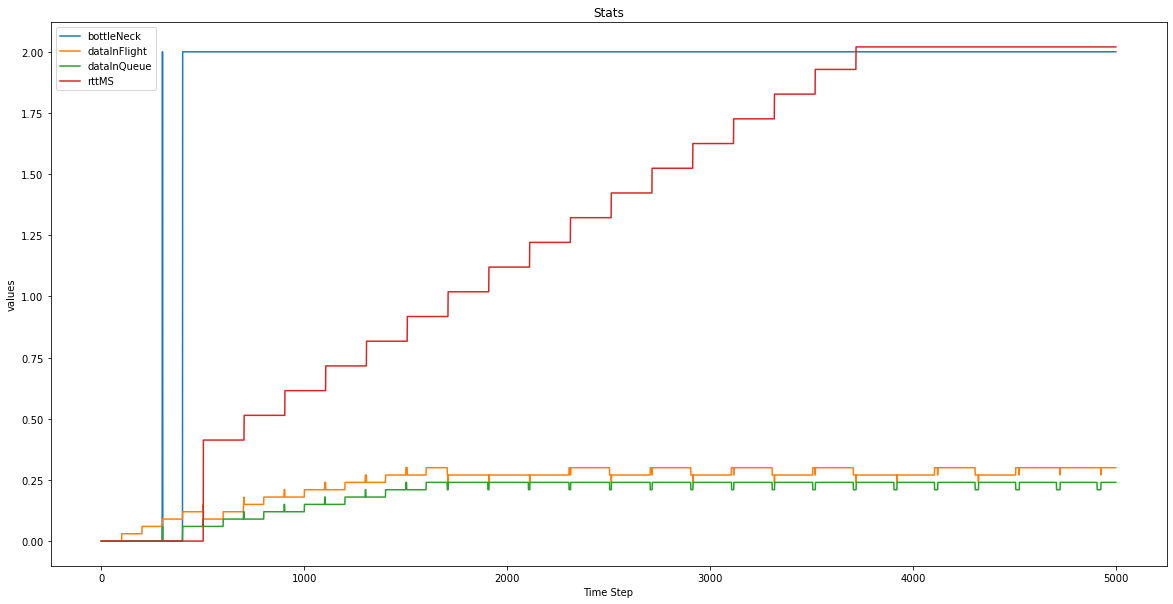

In [9]:
nodeManager.reset()
simulator = EventSimulator(timeResolutionUnit=timeResolutionUnit, debug=True)
simulator.addClient(client)
simulator.addClient(client2)

maxSteps = 5000 # equivalent to maxStep timeResolution unit
simulator.run(maxSteps)
# client 1 stats
analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'rttMS'])
analyzer.createPlotsForTimeSteps(client.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'rttMS'])
# client 2 stats
analyzer.createPlotsForTimeSteps(client2.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'rttMS'])
analyzer.createPlotsForTimeSteps(client2.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'rttMS'])